In [1]:
from utils import llm

/home/athip/psu/learning_AI/env/pytorch/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model = llm.Transformer_DecodeOnly(
                tokenizer_path = "./models/BPEs/tokenizer-bpe-conversational-10k.json",
                model_path = "./models/TransformerDecodeOnly/TransformerDecodeOnly_V01_256_768_12_12_3072_mn2_10K_MQcpk8.pth"
)

================No Match===============
================No Match===============


In [3]:
out = model.invoke("Do you know IPhone")
print(out)

I think it is wrong to cheat on your partner's trust if you are not going to cheat on him. You should just cheat on your boyfriend and find someone else to cheat.


In [ ]:
# model.serve()

Starting Flask server on 0.0.0.0:5000...
 * Serving Flask app 'utils.llm'
 * Debug mode: off


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://192.168.1.100:5000
Press CTRL+C to quit
127.0.0.1 - - [09/May/2025 00:35:04] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [09/May/2025 00:35:04] "GET /favicon.ico HTTP/1.1" 404 -


In [5]:
import requests
import json

# Configuration
SERVER_URL = "http://localhost:5000"  # Or "http://0.0.0.0:5000" if running server on 0.0.0.0
HEALTH_ENDPOINT = f"{SERVER_URL}/health"
PREDICT_ENDPOINT = f"{SERVER_URL}/predict"

def check_server_health():
    """Checks the health of the model server."""
    print(f"Checking server health at {HEALTH_ENDPOINT}...")
    try:
        response = requests.get(HEALTH_ENDPOINT, timeout=5) # 5 second timeout
        response.raise_for_status()  # Raises an HTTPError for bad responses (4XX or 5XX)
        
        health_status = response.json()
        print(f"Server Status: {health_status.get('status', 'N/A')}")
        print(f"Message: {health_status.get('message', 'No message')}")
        return True
    except requests.exceptions.HTTPError as http_err:
        print(f"HTTP error occurred: {http_err}")
        print(f"Response content: {response.content.decode() if response else 'N/A'}")
    except requests.exceptions.ConnectionError as conn_err:
        print(f"Connection error occurred: {conn_err}")
        print("Ensure the Flask server is running and accessible.")
    except requests.exceptions.Timeout as timeout_err:
        print(f"Timeout error occurred: {timeout_err}")
    except requests.exceptions.RequestException as req_err:
        print(f"An error occurred: {req_err}")
    return False

def get_prediction(question_text):
    """
    Sends a question to the prediction endpoint and returns the answer.
    
    Args:
        question_text (str): The question to send to the model.
        
    Returns:
        str or None: The model's answer, or None if an error occurs.
    """
    print(f"\nSending question to {PREDICT_ENDPOINT}: '{question_text}'")
    
    payload = {"question": question_text}
    headers = {"Content-Type": "application/json"}
    
    try:
        response = requests.post(PREDICT_ENDPOINT, json=payload, headers=headers, timeout=60) # 60 second timeout for prediction
        response.raise_for_status() # Raises an HTTPError for bad responses (4XX or 5XX)
        
        result = response.json()
        if "answer" in result:
            print(f"Received answer: '{result['answer']}'")
            return result["answer"]
        elif "error" in result:
            print(f"Server returned an error: {result['error']}")
            return None
        else:
            print("Unexpected response format from server.")
            print(f"Response: {result}")
            return None
            
    except requests.exceptions.HTTPError as http_err:
        print(f"HTTP error occurred: {http_err}")
        try:
            error_details = response.json()
            print(f"Server error details: {error_details.get('error', 'No details provided')}")
        except json.JSONDecodeError:
            print(f"Response content (not JSON): {response.content.decode() if response else 'N/A'}")
    except requests.exceptions.ConnectionError as conn_err:
        print(f"Connection error occurred: {conn_err}")
        print("Ensure the Flask server is running and accessible.")
    except requests.exceptions.Timeout as timeout_err:
        print(f"Timeout error occurred: {timeout_err}")
    except requests.exceptions.RequestException as req_err:
        print(f"An error occurred: {req_err}")
    return None

if __name__ == "__main__":
    # 1. Check server health
    if not check_server_health():
        print("\nServer health check failed. Please ensure the server is running correctly.")
        # exit() # You might want to exit if health check fails

    # 2. Get a prediction
    sample_question = "What is the capital of France?"
    answer = get_prediction(sample_question)
    
    if answer:
        print(f"\n--- Summary ---")
        print(f"Q: {sample_question}")
        print(f"A: {answer}")
    else:
        print(f"\nFailed to get an answer for: '{sample_question}'")

    # Example with an empty question (should be handled by server validation)
    print("\n--- Testing with an empty question ---")
    empty_question_answer = get_prediction("")
    if empty_question_answer:
         print(f"A (empty question): {empty_question_answer}") # Unexpected
    else:
        print("Correctly failed to get an answer for an empty question (or server returned an error).")

    # Example with a different question
    print("\n--- Testing with another question ---")
    another_question = "Tell me a joke."
    another_answer = get_prediction(another_question)
    if another_answer:
        print(f"\n--- Summary ---")
        print(f"Q: {another_question}")
        print(f"A: {another_answer}")
    else:
        print(f"\nFailed to get an answer for: '{another_question}'")

Checking server health at http://localhost:5000/health...
Server Status: ok
Message: Model server is running

Sending question to http://localhost:5000/predict: 'What is the capital of France?'
Received answer: 'The capital of India is New Dely.'

--- Summary ---
Q: What is the capital of France?
A: The capital of India is New Dely.

--- Testing with an empty question ---

Sending question to http://localhost:5000/predict: ''
HTTP error occurred: 400 Client Error: BAD REQUEST for url: http://localhost:5000/predict
Server error details: 'question' cannot be empty or just whitespace
Correctly failed to get an answer for an empty question (or server returned an error).

--- Testing with another question ---

Sending question to http://localhost:5000/predict: 'Tell me a joke.'
Received answer: 'Assummer's the United States is a capital system of the United States was 71.34239  72 tror 71. 
3'

--- Summary ---
Q: Tell me a joke.
A: Assummer's the United States is a capital system of the Uni

In [7]:
sample_question = "hello"
answer = get_prediction(sample_question)


Sending question to http://localhost:5000/predict: 'hello'
Received answer: 'I am not sure if you were a good reason. I hope you are able to listen to your friends and not fix it.'


In [8]:
l_list = [0.029950230413260052 , 0.030095224353020818 , 0.029895375042112284 , 0.029853476860683986 , 0.02978262512470632 , 0.029629605910724104 , 0.029641052601211387 , 0.029540019502903345 , 0.029434250248762978 , 0.029391682422202494 , 0.029195147899470184]

In [19]:
ll = sum([l_list[i] - l_list[i+1] for i in range(len(l_list) -1)])/(len(l_list) - 1)

In [15]:
from matplotlib import pyplot as plt

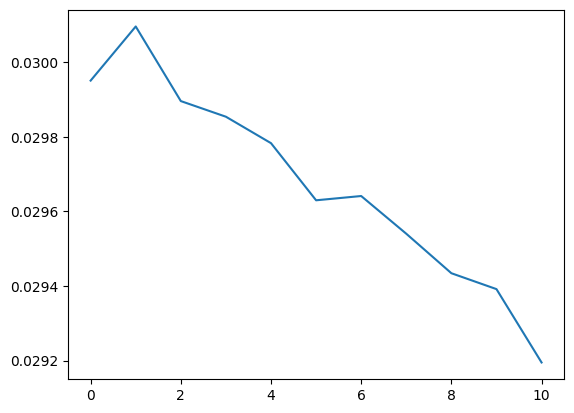

In [16]:
plt.plot(l_list)

In [25]:
l_list[-1] - (ll * 2)

0.02904413139671221

In [ ]:
0.02927800889066871

In [1]:
[0.0610, 0.0570]

[0.061, 0.057]

In [2]:
0.0610 - 0.0570

0.003999999999999997

In [8]:
0.0570 - 0.0038*5

0.038000000000000006